Krzysztof Swędzioł 418001 MOWNiT lab7 

In [1]:
using Pkg
#Pkg.add("QuadGK")
using QuadGK
using Polynomials

    Updating registry at `C:\Users\feXi\.julia\registries\General.toml`
   Resolving package versions...
   Installed JpegTurbo_jll ─────── v3.0.3+0
   Installed GR_jll ────────────── v0.73.5+0
   Installed Libmount_jll ──────── v2.40.1+0
   Installed OffsetArrays ──────── v1.14.0
   Installed Unitful ───────────── v1.20.0
   Installed DomainSets ────────── v0.7.14
   Installed Xorg_libSM_jll ────── v1.2.4+0
   Installed OpenSSL ───────────── v1.4.3
   Installed Cairo_jll ─────────── v1.18.0+2
   Installed Fontconfig_jll ────── v2.13.96+0
   Installed StaticArrays ──────── v1.9.4
   Installed HTTP ──────────────── v1.10.8
   Installed Libgpg_error_jll ──── v1.49.0+0
   Installed SentinelArrays ────── v1.4.3
   Installed Missings ──────────── v1.2.0
   Installed LZO_jll ───────────── v2.10.2+0
   Installed InfiniteArrays ────── v0.13.8
   Installed BandedMatrices ────── v1.7.0
   Installed FriBidi_jll ───────── v1.0.14+0
   Installed TranscodingStreams ── v0.10.8
   Installed Compat ───

Zadanie 1

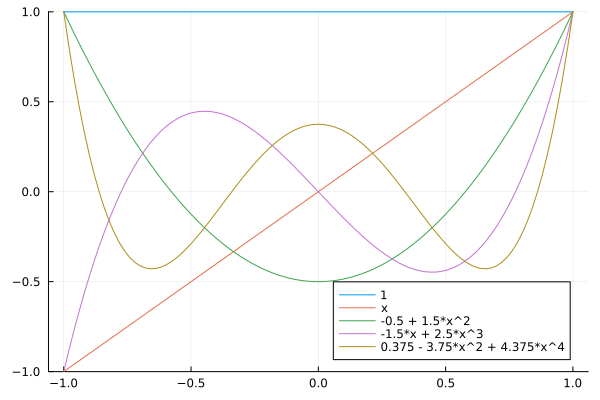

In [7]:
using Polynomials
using Plots
using QuadGK

xs = -1:1

poly0 = Polynomial([1])
poly1 = Polynomial([0,1])
poly2 = 3/2*poly1*poly1 - 1/2*poly0
poly3 = 5/3*poly1*poly2 - 2/3*poly1
poly4 = 7/4*poly1*poly3 - 3/4*poly2

plot(poly0,extrema(xs)...)
plot!(poly1,extrema(xs)...)
plot!(poly2,extrema(xs)...)
plot!(poly3,extrema(xs)...)
plot!(poly4, extrema(xs)..., ylim = (-1.0,1.0))




Twierdzenie mówi iż miejsca zerowe odpowiedniego wielomianu danego stopnia są równe odciętym kwadratury Gaussa.
Sprawdźm zatem czy tak jest w tym przypadku : 

In [ ]:
println(roots(poly2))
(x_value, weight) = gauss(Float64,2)
println(x_value)
println(roots(poly3))
(x_value, weight) = gauss(Float64,3)
println(x_value)
println(roots(poly4))
(x_value, weight) = gauss(Float64,4)
println(x_value)

Jak widać, wynik zgadza się z tym co mówi twierdzenie

Zadanie 2

In [8]:
function gaussIntegral(k,f)
    (roots, coeffs) = gauss(k)
    return sum(coeffs.*f.(roots))
end

function test_gauss_quadrature(max_degree, test)
    for n in 1:max_degree
        # Definiujemy wielomian stopnia n
        curr_poly = Polynomial(test[n])
        
        approx_integral = gaussIntegral(n, curr_poly)
        
        # Obliczamy dokładną wartość całki
        exact_integral = quadgk(curr_poly, -1, 1)[1]
    
        
        println("Stopień wielomianu: $n")
        println("Dokładna całka: $(1^length(curr_poly) - ((-1)^length(curr_poly)))")
        println("Aproksymowana całka (kwadratura Gaussa): $approx_integral")
        println("Błąd: $(abs(exact_integral - approx_integral))")
        println()
    end
end

test = [
 [1],
 [0, 2],
 [0, 0, 3],
 [0, 0, 0, 4],
 [0, 0, 0, 0, 5],
 [0, 0, 0, 0, 0, 6],
 [0, 0, 0, 0, 0, 0, 7],
 [0, 0, 0, 0, 0, 0, 0, 8],
 [0, 0, 0, 0, 0, 0, 0, 0, 9],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 10]
]

test_gauss_quadrature(10, test)

Stopień wielomianu: 1
Dokładna całka: 2
Aproksymowana całka (kwadratura Gaussa): 2.0
Błąd: 0.0

Stopień wielomianu: 2
Dokładna całka: 0
Aproksymowana całka (kwadratura Gaussa): 0.0
Błąd: 0.0

Stopień wielomianu: 3
Dokładna całka: 2
Aproksymowana całka (kwadratura Gaussa): 2.0
Błąd: 0.0

Stopień wielomianu: 4
Dokładna całka: 0
Aproksymowana całka (kwadratura Gaussa): 0.0
Błąd: 8.900295434028806e-308

Stopień wielomianu: 5
Dokładna całka: 2
Aproksymowana całka (kwadratura Gaussa): 2.0000000000000004
Błąd: 6.661338147750939e-16

Stopień wielomianu: 6
Dokładna całka: 0
Aproksymowana całka (kwadratura Gaussa): -2.220446049250313e-16
Błąd: 2.220446049250313e-16

Stopień wielomianu: 7
Dokładna całka: 2
Aproksymowana całka (kwadratura Gaussa): 2.000000000000001
Błąd: 1.3322676295501878e-15

Stopień wielomianu: 8
Dokładna całka: 0
Aproksymowana całka (kwadratura Gaussa): 1.4432899320127035e-15
Błąd: 1.4432899320127035e-15

Stopień wielomianu: 9
Dokładna całka: 2
Aproksymowana całka (kwadratura 

Widać że ze wzrostem stopnia wielomianu, w pewnym momencie błąd się zwiększa. Wynika to z twierdzenia o stopniu dokładności kwadratury Gaussa 
mówiącego iż dokładność jest zgodna ze wzorem 2n-1, zatem dla n = 3 dokładnośc jest zgodna do stopnia 5 

Zadanie 3

In [9]:
function universalIntegral(k,f,a,b)
    (roots,coeffs) = gauss(k)
    roots = (b-a)/2 * roots .+ (b+a)/2
    value = (b-a)/2 * sum(coeffs.*f.(roots))
    return value
end


println("funkcja wielomianowa x + 2 x^2")
test1 = Polynomial([0,1,2])
#Dla funkcji x + 2 x^2 spodziewamy się w przedziale 1, 7 wyniku : 252
for i in 1:3
    println("stopień : $i oczekiwana wartość: 252 otrzymana wartość: $(universalIntegral(i,test1,1,7))")
end

#Dla funkcji x + 2 x^2 spodziewamy się w przedziale 1, 7 wyniku : -0,2136
println("funkcja trygonometryczna sinus")
test2 = sin
for i in 1:3
    println("stopień : $i oczekiwana wartość: -0,2136 otrzymana wartość: $(universalIntegral(i,test2,1,7))")
end

funkcja wielomianowa x + 2 x^2
stopień : 1 oczekiwana wartość: 252 otrzymana wartość: 216.0
stopień : 2 oczekiwana wartość: 252 otrzymana wartość: 251.99999999999994
stopień : 3 oczekiwana wartość: 252 otrzymana wartość: 252.0
funkcja trygonometryczna sinus
stopień : 1 oczekiwana wartość: -0,2136 otrzymana wartość: -4.540814971847569
stopień : 2 oczekiwana wartość: -0,2136 otrzymana wartość: 0.7290575341879781
stopień : 3 oczekiwana wartość: -0,2136 otrzymana wartość: -0.29306887708623


Zadanie 4

In [10]:
func = Polynomial([0,1,2,3])
println("Function : $func tested in range : [0, 8]")
println("Expected Value : 3445,3")
result = quadgk(func,0,8)[1]
println("Received Value : $result")

gaussFun(x) = 1/sqrt(2*pi)*exp((-x^2)/2)
println("Function : $gaussFun tested in range : [-inf, inf]")
println("Expected Value : 1")
result2 = quadgk(gaussFun,-Inf,Inf)[1]
println("Received Value : $result2")

Function : x + 2*x^2 + 3*x^3 tested in range : [0, 8]
Expected Value : 3445,3
Received Value : 3445.3333333333335
Function : gaussFun tested in range : [-inf, inf]
Expected Value : 1
Received Value : 1.0000000000032583


Zadanie 5

In [26]:
using Plots


function rectangle_integration(f, a, b, n)
    h = (b - a) / n
    x = a:h:(b-h)
    return h * sum(f.(x))
end


function trapezoidal_integration(f, a, b, n)
    h = (b - a) / n
    x = a:h:b
    return (h/2) * (f(a) + 2 * sum(f.(x[2:end-1])) + f(b))
end


function simpson_integration(f, a, b, n)
    if n % 2 != 0
        n += 1  
    end
    h = (b - a) / n
    x = a:h:b
    return (h/3) * (f(a) + 4 * sum(f.(x[2:2:end-1])) + 2 * sum(f.(x[3:2:end-2])) + f(b))
end


testFunction1(x) = exp(x)
interval1 = (2,4)
expected = 47.20909
xs = Vector{Float64}()
rectangleError = Vector{Float64}()
trapezzeError = Vector{Float64}()
simpsonError = Vector{Float64}()
n = 1
while n <= 10
    append!(xs,2/n)
    append!(rectangleError,abs(expected-rectangle_integration(testFunction1,2,4,n)))
    append!(trapezzeError,abs(expected-trapezoidal_integration(testFunction1,2,4,n)))
    append!(simpsonError,abs(expected-simpson_integration(testFunction1,2,4,n)))
    n += 1
end
testFunction2 = sin
interval2 = (0,2*pi)
expected2 = 0
xs2 = Vector{Float64}()
rectangleError2 = Vector{Float64}()
trapezzeError2 = Vector{Float64}()
simpsonError2 = Vector{Float64}()
n = 1
while n <= 10
    append!(xs2,2*pi/n)
    append!(rectangleError2,abs(expected2-rectangle_integration(testFunction2,0,2*pi,n)))
    append!(trapezzeError2,abs(expected2-trapezoidal_integration(testFunction2,0,2*pi,n)))
    append!(simpsonError2,abs(expected2-simpson_integration(testFunction2,0,2*pi,n)))
    n += 1
end



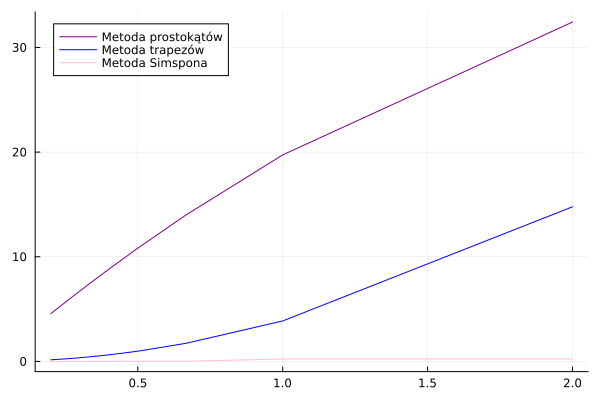

In [32]:
plot(
    xs,
    [rectangleError, trapezzeError, simpsonError],
    label=["Metoda prostokątów" "Metoda trapezów" "Metoda Simspona"],
    color = ["purple" "blue" "pink"],
    layout=1
)


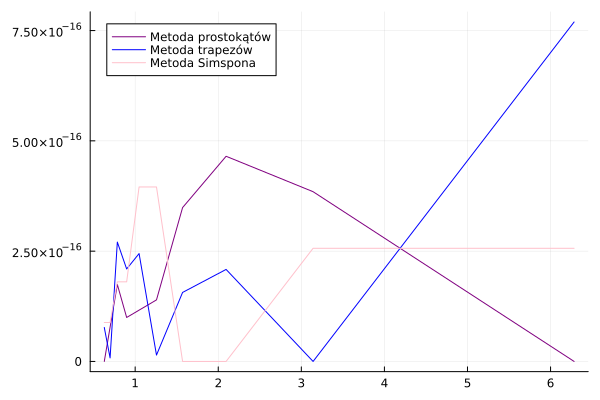

In [33]:
plot(
    xs2,
    [rectangleError2, trapezzeError2, simpsonError2],
    label=["Metoda prostokątów" "Metoda trapezów" "Metoda Simspona"],
    color = ["purple" "blue" "pink"],
    layout=1
)